# Chapter 3 신경망

## 3.1 퍼셉트론에서 신경망으로

퍼셉트론에서 가중치와 편향을 직접 설정하는 반면에 <br>
신경망은 매개변수의 적절한 값을 데이터로부터 자동으로 학습한다.

### 3.1.1 신경망의 예

신경망은 가장 왼쪽부터 입력층, 은닉층, 출력층이 존재한다.

- 입력층(input): 값을 입력 받는다
- 은닉층(hidden): 사람 눈에 보이지 않는다
- 출력층(output): 은닉층을 통한 값을 출력한다

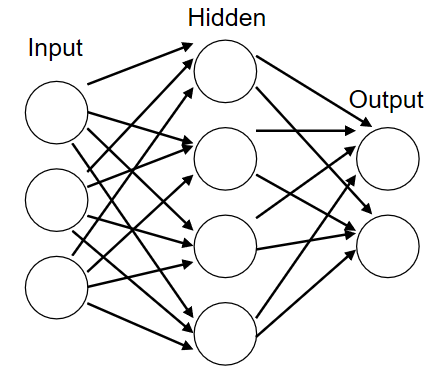

### 3.1.2 퍼셉트론 복습

아래의 세 식은 같다

- y = <br>
0(b + w1x1 + w2x2 <= 0)<br>
1(b + w1x1 + w2x2 > 0)<br>


- y = h(b + w1x1 + w2x2)<br>


- h(x) = <br>
0(x<=0)<br>
1(x>0)


### 3.1.3 활성화 함수

- 활성화 함수: 입력 신호의 총합을 출력 신호로 변환하는 함수

기존 뉴런의 원을 키우고, 그 안에 활성화 함수의 처리 과정을 포함한다.



## 3.2 활성화 함수

- 계단함수: 임계값을 경계로 출력이 바뀌는 함수

### 3.2.1 시그모이드 함수

h(x) = 1/(1 + exp(-x))<br>
(exp(-x): e^(-x))

신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달한다.



In [5]:
# 3.2.2 계단 함수 구현하기

#입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력
def step_function(x):
    if x>0:
        return 1
    else:
        return 0
    
    
print(step_function(1))
print(step_function(0))

#numpy 배열을 이용하기 위해 수정
#y는 bool 타입의 넘파이 배열이 된다
#넘파이 배열의 자료형을 변환하기 위해 astype를 사용한다

import numpy as np

def step_function2(x):
    y = x > 0
    return y.astype(np.int)

x = np.array([-1.0,1.0,2.0])
print(step_function2(x))


1
0
[0 1 1]


계단 함수 그래프


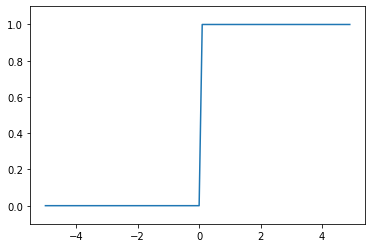

In [20]:
# 3.2.3 계단 함수의 그래프

import numpy as np
import matplotlib.pylab as plt

def step_function3(x):
    return np.array(x>0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1) #-5부터 5까지 0.1 간격으로
y = step_function3(x)

print("계단 함수 그래프")
plt.plot(x,y)
plt.ylim(-0.1, 1.1) #y축의 범위 지정
#plt.xlim(-0.2,0.2)
plt.show()

[0.26894142 0.73105858 0.88079708]
시그모이드 함수 그래프


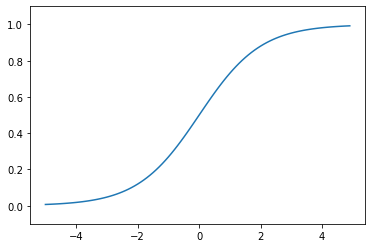

In [19]:
# 3.2.4 시그모이드 함수 구현하기

def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
print(sigmoid(x))
#print(1.0 + x)

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

print("시그모이드 함수 그래프")
plt.plot(x,y)
plt.ylim(-0.1,1.1) #y축 범위 지정
plt.show()


### 3.5.5 시그모이드 함수와 계단 함수 비교

시그모이드 함수와 계단 함수의 차이: 매끄러움
- 시그모이드 함수는 입력에 따라 연속적인 출력
- 계단 함수는 0을 경계로 바뀌는 출력

시그모이드의 이 매끄러움이 신경망 학습에서 중요한 역할!

### 3.2.6 비선형 함수

- 계단 함수와 시그모이드 함수의 공통점1: 양 끝이 0과 1을 향한다
- 계단 함수와 시그모이드 함수의 공통점2: 비선형 함수

선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어진다.<br>
ex) h(x) = cx, y(x) = h(h(h(x)))<br>
-> y(x) = c * c * c * x <br>
-> y = ax <br>
-> 층을 깊게 하는 의미가 없다


### 3.2.7 ReLU 함수

최근에 신경망 분야에서 사용하는 함수

입력이 0을 넘으면 그 입력을 그대로 출력, 0 이하면 0을 출력하는 함수<br>
<br>
다음과 같은 형상이다 _/

h(x) = <br>
x (x>0)<br>
0 (x<=0)


In [22]:
#ReLU 함수 구현

def relu(x):
    return np.maximum(0,x)

relu(2)


2

## 3.3 다차원 배열의 계산

넘파이의 다차원 배열을 통해 효과적인 신경망 구현


In [25]:
# 3.3.1 다차원 배열

import numpy as np
a = np.array([1,2,3,4])
print(a)
print(np.ndim(a)) #배열의 차원 수
print(a.shape) #배열의 형상, tuple로 반환
print(a.shape[0]) #a의 0행의 차원

[1 2 3 4]
1
(4,)
4


In [27]:
b = np.array([[1,2],[3,4],[5,6]])
print(b)
print(np.ndim(b)) #배열의 차원 수
print(b.shape) #배열의 형상, 행과 열

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


In [29]:
# 3.3.2 행렬의 곱

a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])

print(a.shape)
print(np.dot(a,b)) #원소에 해당하는 행과 열의 원소를 곱한 후 더한다
print(np.dot(b,a)) #연산의 순서를 바꾸면 값이 달라질 수 있다

(2, 2)
[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [32]:
#dot은 첫 번째 배열의 열과 두 번째 배열의 행의 수가 일치해야 한다
a = np.array([[1,2],[3,4],[5,6]])
b = np.array([7,8])

print(np.dot(a,b))
#print(np.dot(b,a)) : error

[23 53 83]


In [35]:
# 3.3.3 신경망에서의 행렬 곱

#xw = y
x = np.array([1,2])
w = np.array([[1,3,5],[2,4,6]])
y = np.dot(x,w)

print(y)

[ 5 11 17]


## 3.4 3층 신경망 구현하기

### 3.4.1 표기법 설명

이번 챕터에서만 사용
- 뉴런 /다음층 뉴런/앞층 뉴런/층 별 가중치(ex: w 1/2/1)

0층에 3개의 뉴런(1,x1,x2), 1층에 3개의 뉴런이 있을 때, 1층의 첫번째 뉴런<br>
- a 1/1 = w 1/1/1 + w 1/2/1 + w 1/3/1

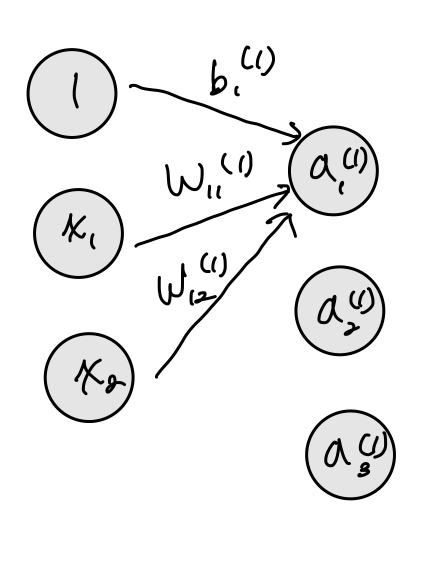

행렬의 곱을 이용하면<br>
a 1 = x(w 1) + (b 1)
- a 1 = (a 1/1 a 2/1 a 3/1)
- x = (x1 x2)
- b 1 = (b 1/1 b 2/1 b 3/1)
- w 1 = (w 1/1/1 ...<br>
...w 3/2/1)

In [38]:
x = np.array([1,0.5])
w1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.0,0.2,0.3])

print(w1.shape)
print(x.shape)
print(b1.shape)

a1 = np.dot(x,w1) + b1
print(a1)

(2, 3)
(2,)
(3,)
[0.2 0.7 1.1]


1층의 활성화 함수에서의 처리는 다음과 같다
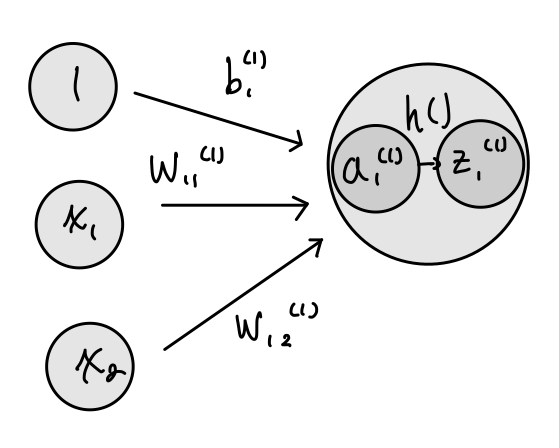

In [39]:
z1 = sigmoid(a1)

print(a1)
print(z1)

[0.2 0.7 1.1]
[0.549834   0.66818777 0.75026011]


이어서 1층에서 2층으로 가는 과정

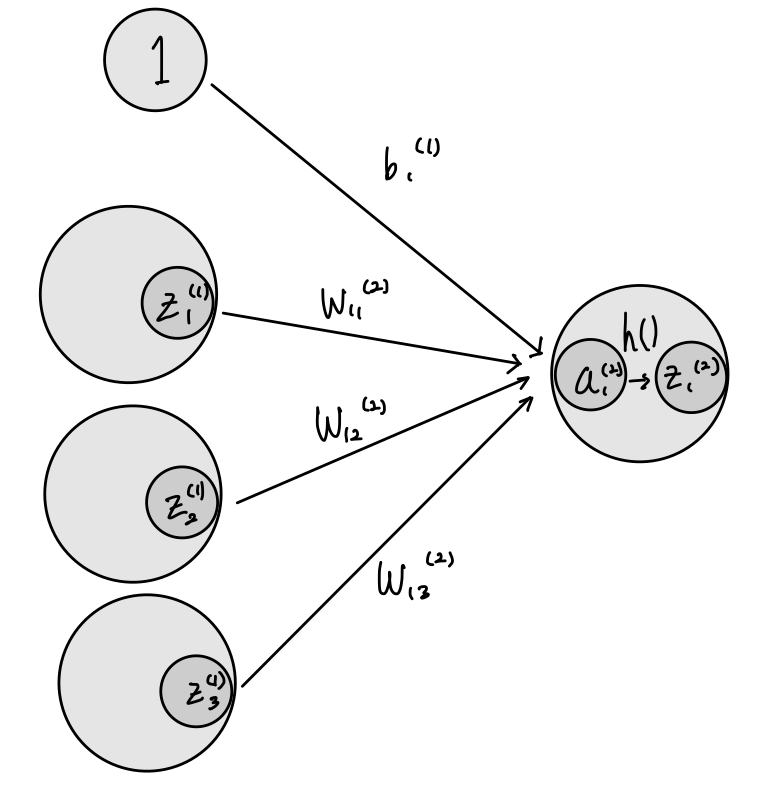

In [41]:
w2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
b2 = np.array([0.1,0.2])

print(z1.shape)
print(w2.shape)
print(b2.shape)

a2 = np.dot(z1,w2) + b2
z2 = sigmoid(a2)

print(a2)
print(z2)


(3,)
(3, 2)
(2,)
[0.51369899 1.20418355]
[0.6256732  0.76926818]


2층에서 출력층으로의 신호 전달은 활성화 함수만 다르다

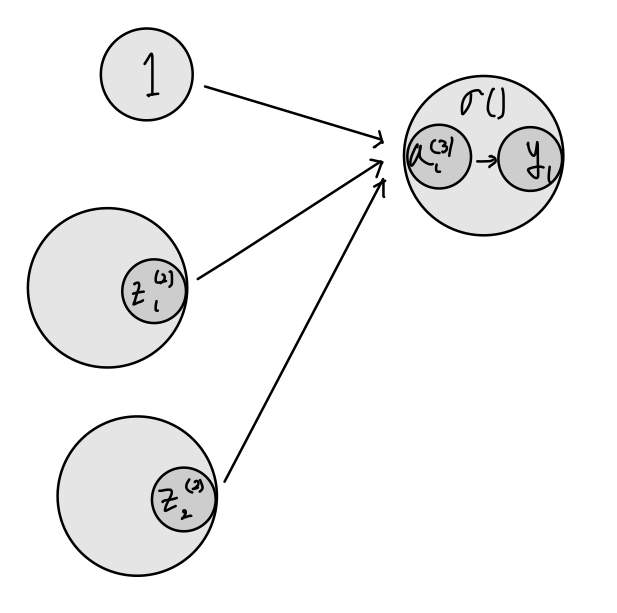

In [43]:
#출력층의 활성화 함수를 항등 함수로 구현

def identity_function(x):
    return x

w3 = np.array([[0.1,0.3],[0.2,0.4]])
b3 = np.array([0.1,0.2])

a3 = np.dot(z2,w3) + b3
y = identity_function(a3)
print(y)

[0.31642096 0.69540923]


In [45]:
# 3.4.3 구현 정리

def init_network(): #가중치와 편향을 초기화하고 dic인 network에 저장
    network = {}
    network['w1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
    network['b1'] = np.array([0.1,0.2,0.3])
    network['w2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
    network['b2'] = np.array([0.1,0.2])
    network['w3'] = np.array([[0.1,0.3],[0.2,0.4]])
    network['b3'] = np.array([0.1,0.2])
    
    return network

def forward(network, x): #입력 신호를 출력 신호로 변환하는 함수(순방향:forward)
    w1,w2,w3 = network['w1'],network['w2'],network['w3']
    b1,b2,b3 = network['b1'],network['b2'],network['b3']
    
    a1 = np.dot(x,w1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,w2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,w3) + b3
    y = identity_function(a3)

    return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


## 3.5 출력층 설계하기

신경망은 분류와 회귀 모두에 이용할 수 있다. 다만 출력층에서 사용하는 활성화 함수가 달라진다

NOTE<br>
기계학습 문제는 분류와 회귀로 나뉜다.
- 분류: 데이터가 어느 클레스에 속하는지 나누기
- 회귀는 입력 데이터에서 수치를 예측하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기
- 항등 함수: 입력을 그대로 출력하는 함수
- 소프트맥스 함수(softmax function):<br>
y = [exp(a(k))]/[n(sigma)(i = 1)(exp(a(i))]<br>

분자는 e^x의 지수 함수, 분모는 모든 입력 신호의 지수 함수의 합<br>
출력층의 각 뉴런이 모든 입력 신호에서 영향을 받는다


In [46]:
#소프트맥스 함수 구현 과정

a = np.array([0.3,2.9,4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [47]:
#소프트맥스 함수 구현

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

지수 함수에서 큰 값을 반환하기 때문에 큰 값끼리 나눗셈을 하면 오버플로우가 발생할 수 있다<br>
그렇기 때문에 함수를 개선해야 한다

y = [exp(a(k))] / [n(sigma)(i = 1)(exp(a(i))] 
<br>= c[exp(a(k))] / c[n(sigma)(i = 1)(exp(a(i))] 
<br>=  [exp(a(k)+log c)] / [n(sigma)(i = 1)(exp(a(i) + log c)] 
<br>= [exp(a(k)+ c')] / [n(sigma)(i = 1)(exp(a(i) + c')]

c'에 어떤 값을 대입해도 상관 없지만, 오버 플로우를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적

In [49]:
a = np.array([1010,1000,990])
print(np.exp(a)/np.sum(np.exp(a))) #제대로 계산되지 않는다

c = np.max(a) #
print(a-c)

print(np.exp(a-c)/np.sum(np.exp(a-c))) 


[nan nan nan]
[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


<ipython-input-49-1e688033a77c>:2: RuntimeWarning: overflow encountered in exp
  print(np.exp(a)/np.sum(np.exp(a))) #제대로 계산되지 않는다
<ipython-input-49-1e688033a77c>:2: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a)/np.sum(np.exp(a))) #제대로 계산되지 않는다


In [50]:
# 3.5.3 소프트맥스 함수의 특징

a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


- 소프트맥스 함수의 출력은 0 과 1.0 사이의 실수이다.
- 소프트맥스 함수의 출력의 합은 1이 된다. -> 확률 -> 소프트맥스 함수를 이용하여 문제를 확률적으로 대응할 수 있다
- 소프트맥스 함수를 적용해도 각 원소의 대소 관계는 변하지 않는다
- 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴런에 해당하는 클래스로만 인식한다
- 소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않는다
- 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 된다

### 3.5.4 출력층의 뉴런 수 정하기

분류에서 분류하고 싶은 클래스 수로 설정하는 것이 일반적<br>
ex)입력 이미지를 0부터 9 중 하나로 분류하는 경우 출력층의 뉴런을 10개로 설정한다


## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

- MNIST 데이터셋: 0부터 9까지의 숫자 이미지, 훈련 이미지 60,000장과 시험 이미지 10,000장

28 x 28 크기의 회색조 이미지이며, 각 픽셀은 0에서 255까지의 값을 취한다.

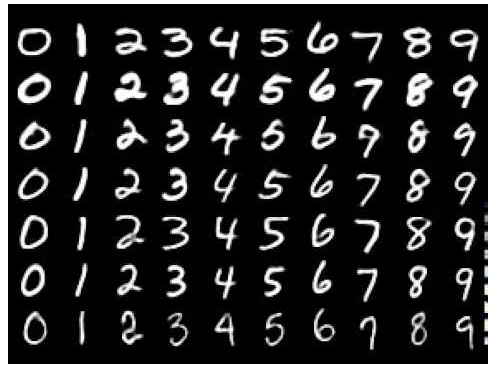

In [53]:
#https://github.com/youbeebee/deeplearning_from_scratch
#위 주소에서 압축 파일을 다운 받은 후 dataset 이름의 파일을 실행 파일과 같은 경로에 둔다

import sys, os
sys.path.append(os.pardir) #부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

#첫 시도는 몇 분정도 걸린다
(x_train, t_train),(x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

#각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


dataset/mnist.py의 load_mnist 함수를 import한다<br>
이때 load_mnist 함수는 읽은 MNIST 데이터를 "(훈련 이미지, 훈련 레이블),(시험 이미지, 시험 레이블)" 형식으로 반환한다

인수로는 normalize, flatten, one_hot_label가 있다(모두 bool 타입)


- normalize(정규화): 전처리 중 하나로, 입력 이미지의 픽셀 값을 0 ~ 1 사이의 값으로 정규화할지 정한다(False일 경우 0~255)
- flatten: 입력 이미지를 1차원 배열로 만들지 정한다(False일 경우 1x28x28의 3차원 배열, True일 경우 784개의 원소를 가진다)
- one_hot_label: one-hot encoding 형태로 저장할지 정한다(one-hot encoding: 정답을 뜻하는 원소만 1이고 나머지는 0인 배열)


In [56]:
#이미지 확인
import sys,os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train),(x_test, t_test) = \
    load_mnist(flatten=True,normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28,28)
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


여기서 주의사항은 flatten=True로 설정해 읽은 이미지는 1차원 넘파이 배열로 저장되어 있기 때문에,<br>
28x28 크기로 다시 변형해야 한다.

reshape() 메서드에 원하는 형상을 지정하여 넘파이 배열의 형상을 바꿀 수 있다.

또한 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 변환해야 하며, 이 변환은 Image.fromarray()가 수행한다.

### 3.6.2 신경망의 추론 처리

신경망을 구현하는 단계

입력층 뉴런 784개, 출력층 뉴런 10개, 은닉층 2개(첫 번째 은닉층에서 50개 뉴런, 두 번째 은닉층에서 100개 뉴런 재배치)


In [72]:
def get_data():
    (x_train, t_train),(x_test,t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

import pickle #피클 파일 import

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3'] #W는 반드시 대문자
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x,W1) +b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1,W2) +b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2,W3) +b3
    y = sigmoid(a3)
    
    return y




x,t = get_data() #MNIST 데이터셋을 얻기
network = init_network() #네트워크 생성

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i]) #각 레이블의 확률을 넘파이 배열로 반환한다.
    p = np.argmax(y)  # 배열에서 확률이 가장 높은 원소의 인덱스를 얻는다.
    
    if p == t[i]: #신경망이 예층한 답변과 정답 레이블을 비교하여 맞힌 숫자를 세고,
        accuracy_cnt += 1 

print("Accuracy:" + str(float(accuracy_cnt) / len(x))) # 이를 전체 이미지 숫자로 나눠 정확도를 구한다



# batch_size = 100

# for i in range(0, len(x), batch_size):
#     x_batch = x[i:i+batch_size]
#     y_batch = predict(network, x_batch)
#     p = np.argmax(y_batch, axis=1)
#     accuracy_cnt += np.sum(p == t[i:i+batch_size])

# print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [73]:
# 3.6.3 배치 처리
# 각 층의 가중치 형상 출력

x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3'] #W는 반드시 대문자

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


- 위 결과에서 다차원 배열의 대응하는 차원의 원소 수가 일치한다는 것을 확인
X(784) W1(784 x 50) W2(50 x 100) W3(100 x 10) -> Y(10)<br>
이는 원소 784개로 구성된 1차원 배열로 변환된 이미지 데이터를 한 장 처리했을 때 처리 흐름으로 차원의 원소수가 일치한다


- 이미지를 여러 장을 한꺼번에 입력하는 경우<br>
X의 형상을 (100 x 784)로 바꾸어<br>
X(100 x 784) W1(784 x 50) W2(50 x 100) W3(100 x 10) -> Y(100 x 10)
입력 데이터 형상은 100 x 784, 출력 데이터 형상은 100 x 10 <br>
x[0]와 y[0]에는 0번째 이미지와 그 추론 결과가, x[1]과 y[1]에는 1번째의 이미지와 그 결과가 저장된다


- 배치(batch): 위처럼 하나로 묶은 입력 데이터<br>
배치 처리는 이미지 1장당 처리 시간을 대폭 줄여준다.(라이브러리의 최적화, 버스에 주는 부하를 줄인다)


In [74]:
#배치 처리 구현
x, t = get_data()
network = init_network()

batch_size = 100 #묶는 단위
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size] #i번째부터 i+batch_size번째까지의 입력 데이터를 묶는다
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) #최댓값의 인덱스 반환
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [75]:
#argmax는 넘파이 배열의 최댓값의 인덱스를 반환한다
x = np.array([[0.1,0.8,0.1],[0.3,0.1,0.6],[0.2,0.5,0.3],[0.8,0.1,0.1]])
y = np.argmax(x , axis=1)
print(y)

[1 2 1 0]


In [76]:
#배치 단위로 분류한 결과를 실제 답과 비교하는 예시
y = np.array([1,2,1,0])
t = np.array([1,2,0,0])

print(y==t)
print(np.sum(y==t))

[ True  True False  True]
3


## 3.7 정리


- 신경망에서는 활성화 함수로 시그모이드 함수와 ReLU 함수 같은 매끄럽게 변화하는 함수를 이용한다
- 넘파이의 다차원 배열을 잘 사용하면 신경망을 효율적으로 구현할 수 있다
- 기계학습 문제는 크게 회귀와 분류로 나눌 수 있다
- 출력층의 활성화 함수로는 회귀에서는 주로 항등 함수를, 분류에서는 주로 소프트맥스 함수를 이용한다
- 분류에서는 출력층의 뉴런 수를 분루하려는 클래스 수와 같게 설정한다
- 입력 데이터를 묶은 것을 배치라 하며, 추론 처리를 이 배치 단위로 진행하면 결과를 빠르게 얻을 수 있다